In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt
from IPython.display import HTML

pd.set_option('display.max_columns', None)

In [2]:
df = pd.read_csv('./data/clean_metrics_19_22.csv')

In [3]:
df.groupby('year')['passenger_miles'].apply(lambda x: x.isna().sum())

year
2019    5
2020    0
2021    0
2022    0
Name: passenger_miles, dtype: int64

In [4]:
df.sample()

,agency,city,state,legacy_ntd_id,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,passengers_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,any_data_questionable?,year,uza_name,passengers_per_vehicle_revenue_hour
3126,Humanitarian Enterprises of Lincoln Parish,Ruston,LA,6R02-013,6R02-60229,"City, County or Local Government Unit or Depar...",Rural Reporter,0.0,4.0,DR,DO,4.0,0.95,0.03,64.43,2.1,31.19,0.0,8894.0,291271.0,9340.0,4521.0,0.0,78232.0,No,2019,NaN,NaN


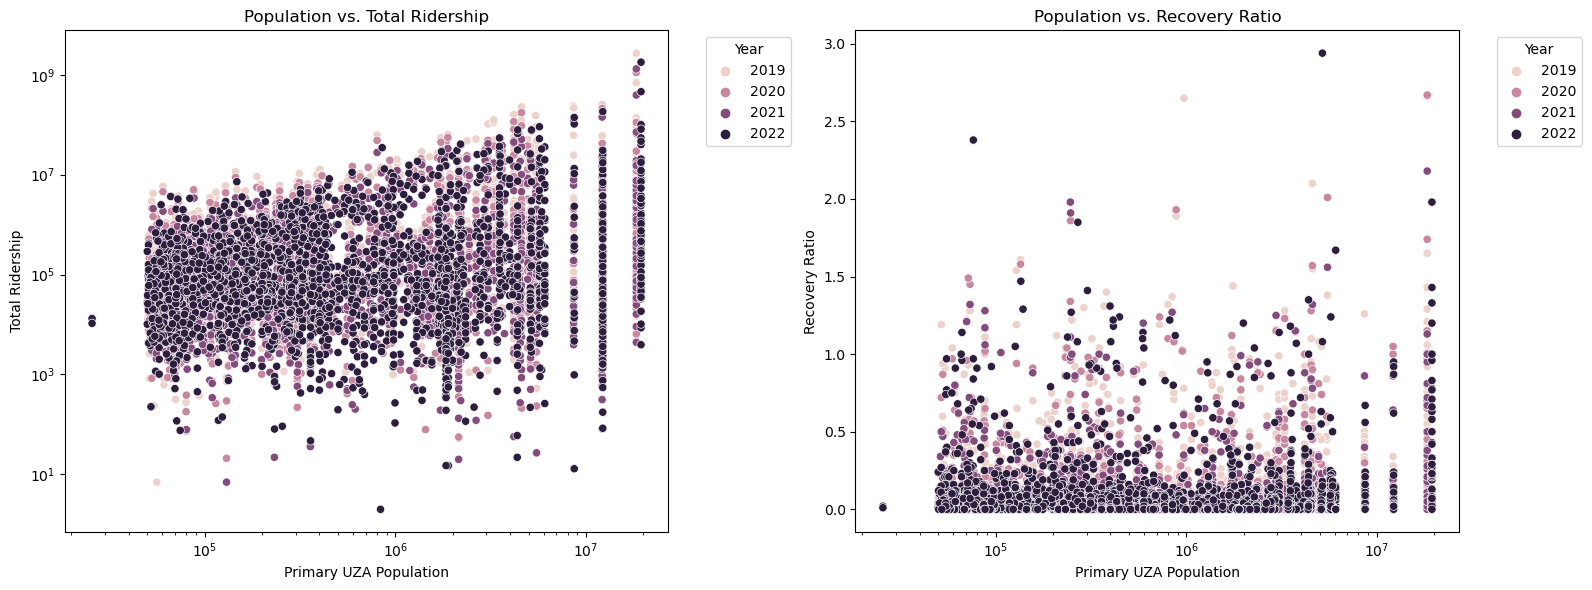

In [5]:
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Relationship between population and total ridership
sns.scatterplot(ax=ax[0], data=df, x='primary_uza_population', y='unlinked_passenger_trips', hue='year')
ax[0].set_title('Population vs. Total Ridership')
ax[0].set_xlabel('Primary UZA Population')
ax[0].set_ylabel('Total Ridership')
ax[0].set_xscale('log')
ax[0].set_yscale('log')
ax[0].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

# Relationship between population and recovery ratio
sns.scatterplot(ax=ax[1], data=df, x='primary_uza_population', y='fare_revenues_per_total_operating_expense_(recovery_ratio)', hue='year')
ax[1].set_title('Population vs. Recovery Ratio')
ax[1].set_xlabel('Primary UZA Population')
ax[1].set_ylabel('Recovery Ratio')
ax[1].set_xscale('log')
ax[1].legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

### Interpretation:


•	**Population vs. Total Ridership:** If there's a positive correlation, larger urbanized areas likely have higher ridership due to greater transit needs and infrastructure.
There's a visible **positive correlation** between the primary urbanized area population and total ridership, as shown by the scatter plot. Larger populations tend to have higher ridership, indicated by the concentration of points towards the higher end of both scales. This suggests that urban areas with larger populations have greater transit needs and possibly more developed transit systems to accommodate these needs.



•	**Population vs. Recovery Ratio:** This plot will reveal if more populous areas tend to have higher or lower profitability in their transit systems.
The recovery ratio's relationship with population appears more **scattered**, indicating that while population size might influence ridership, its effect on financial performance or profitability (as measured by the fare recovery ratio) is less straightforward. Some highly populated areas achieve higher recovery ratios, but the variation is significant across different years and population sizes. This suggests other factors, possibly including service efficiency, fare structures, and operational costs, play crucial roles in determining profitability.


### The top 10 transit agencies account for 50% of all passenger miles.

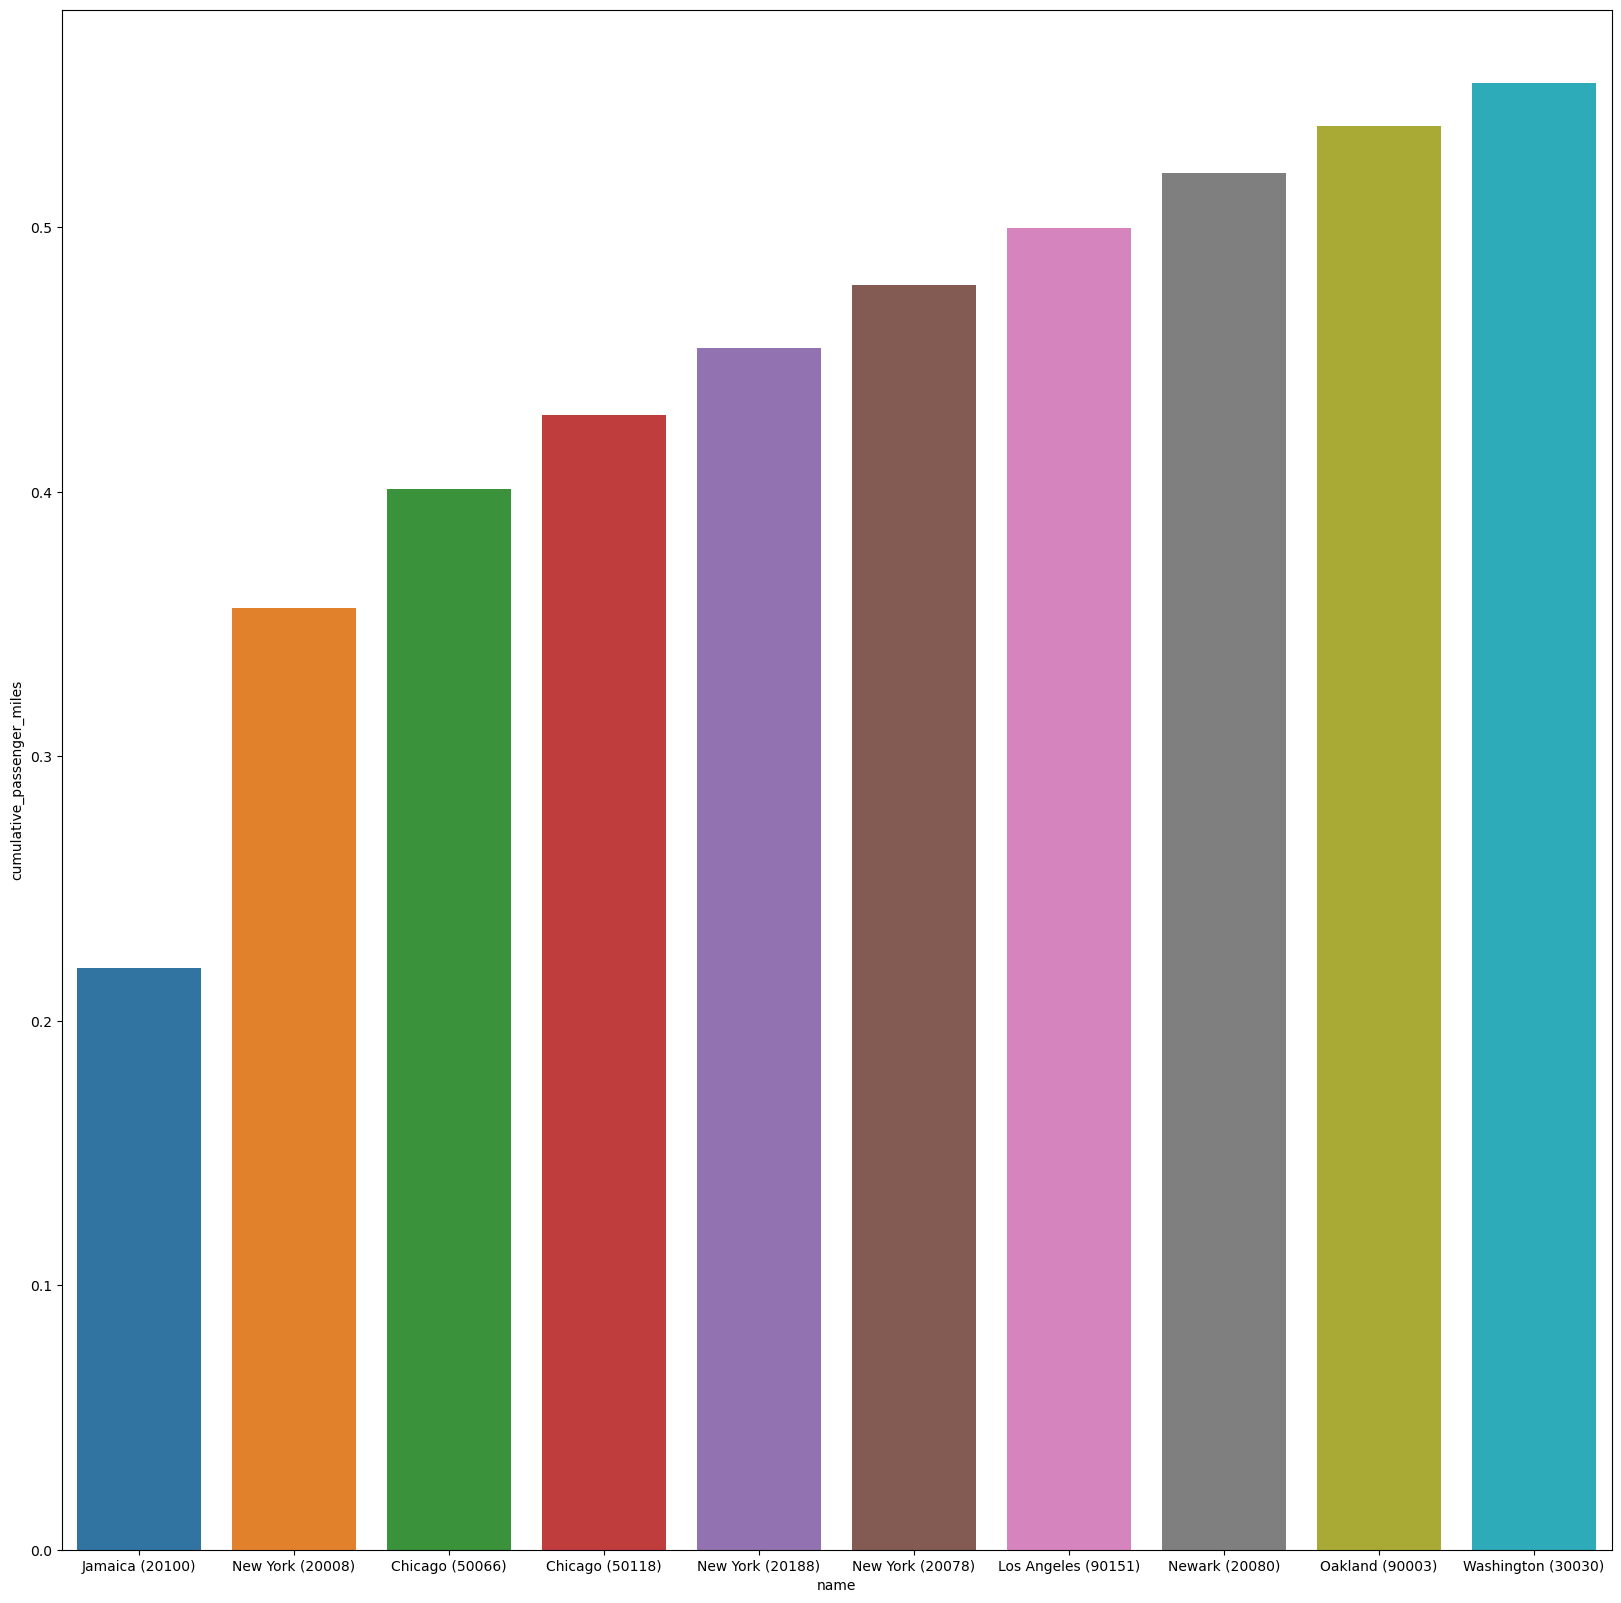

In [6]:
# Calculate the cumulative sum of the 'passenger_miles' column and add it as a new column
group = df.groupby(['ntd_id']).passenger_miles.mean().sort_values(ascending=False).reset_index()
total_miles = group.passenger_miles.sum()
group['cumulative_passenger_miles'] = group['passenger_miles'].cumsum() / total_miles
group = group.head(10)
group['name'] = group.ntd_id.apply(lambda x: f'{df[df.ntd_id == x].city.values[0]} ({x})')

plt.figure(figsize=(20, 20))
sns.barplot(group, x='name', y='cumulative_passenger_miles')
plt.xticks()  # Rotate labels to be vertical
plt.show()

### The top 100 account for about 85%.

In [7]:
'''
# Calculate the cumulative sum of the 'passenger_miles' column and add it as a new column
group = df.groupby(['ntd_id']).passenger_miles.mean().sort_values(ascending=False).reset_index()
total_miles = group.passenger_miles.sum()
group['cumulative_passenger_miles'] = group['passenger_miles'].cumsum() / total_miles
group = group.head(100)
group['name'] = group.ntd_id.apply(lambda x: f'{df[df.ntd_id == x].city.values[0]} ({x})')

plt.figure(figsize=(20, 20))
sns.barplot(group, x='name', y='cumulative_passenger_miles')
plt.xticks(rotation=90)  # Rotate labels to be vertical
plt.show()
'''

"\n# Calculate the cumulative sum of the 'passenger_miles' column and add it as a new column\ngroup = df.groupby(['ntd_id']).passenger_miles.mean().sort_values(ascending=False).reset_index()\ntotal_miles = group.passenger_miles.sum()\ngroup['cumulative_passenger_miles'] = group['passenger_miles'].cumsum() / total_miles\ngroup = group.head(100)\ngroup['name'] = group.ntd_id.apply(lambda x: f'{df[df.ntd_id == x].city.values[0]} ({x})')\n\nplt.figure(figsize=(20, 20))\nsns.barplot(group, x='name', y='cumulative_passenger_miles')\nplt.xticks(rotation=90)  # Rotate labels to be vertical\nplt.show()\n"

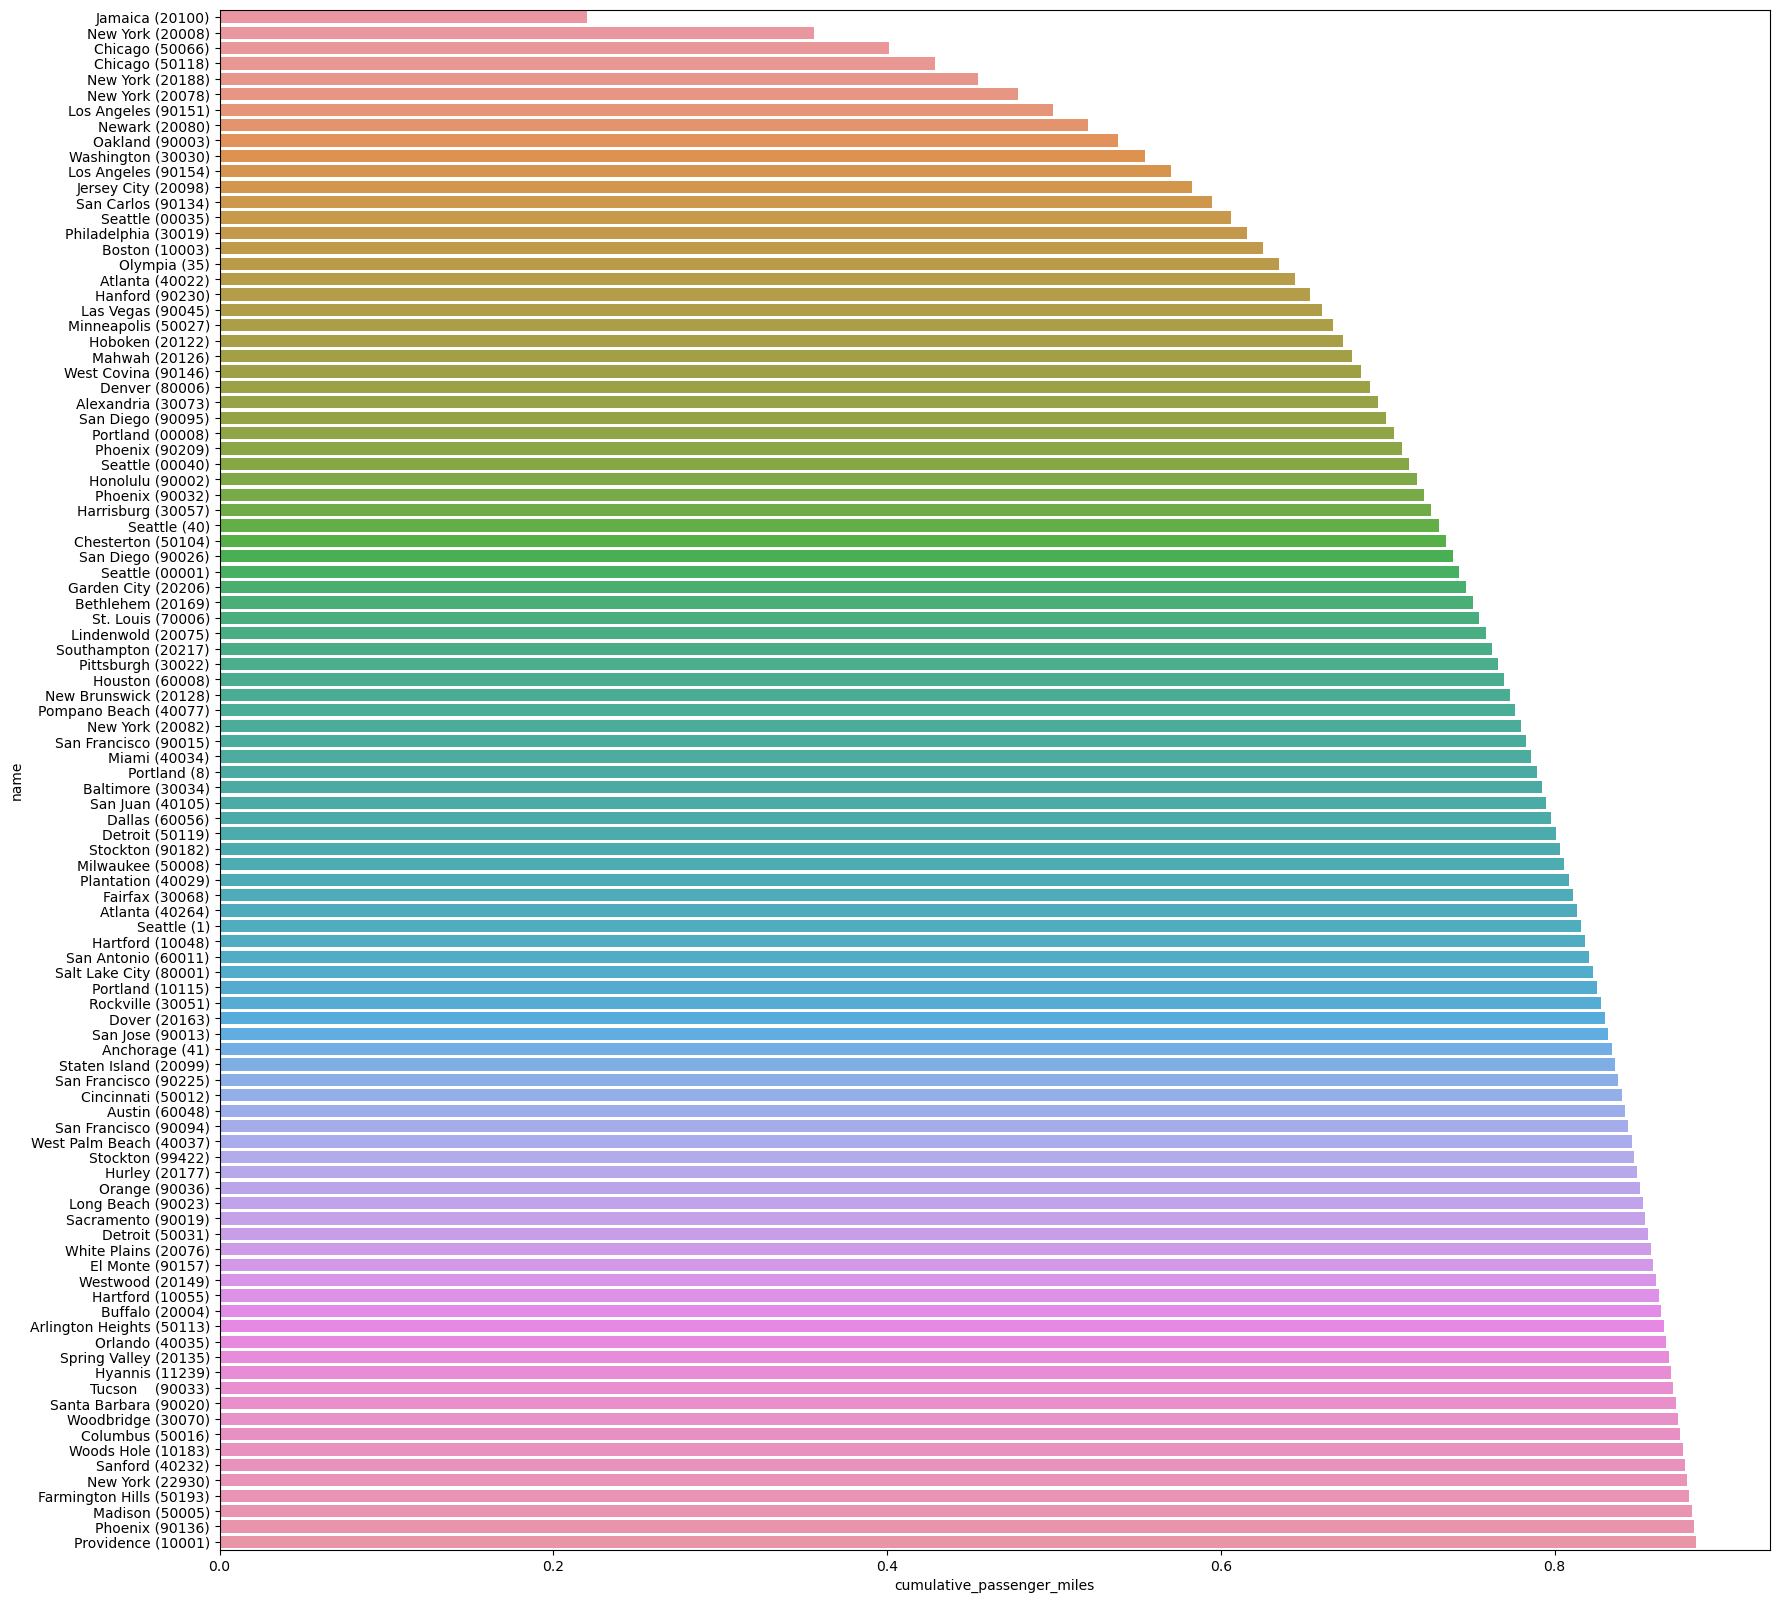

In [8]:
# Calculate the cumulative sum of the 'passenger_miles' column and add it as a new column
group = df.groupby(['ntd_id']).passenger_miles.mean().sort_values(ascending=False).reset_index()
total_miles = group.passenger_miles.sum()
group['cumulative_passenger_miles'] = group['passenger_miles'].cumsum() / total_miles
group = group.head(100)
group['name'] = group.ntd_id.apply(lambda x: f'{df[df.ntd_id == x].city.values[0]} ({x})')

plt.figure(figsize=(20, 20))
sns.barplot(data=group, y='name', x='cumulative_passenger_miles', orient='h')
plt.show()

In [9]:
def yearly_breakdown(df, col, topn=None):
    if topn is None:
        top = df
    else:
        topids = df.groupby('ntd_id')[col].mean().sort_values(ascending=False).head(topn).index
        top = df[df.ntd_id.isin(topids)]
    group = top.groupby('year')[col].mean().reset_index()
    sns.barplot(data=group, x='year', y=col)

    title = f'{col}'
    if topn is not None:
        title = title + f' Top {topn}'
    plt.title(title)
    plt.show()

Passenger miles have sharply declined in the top 20 agencies.

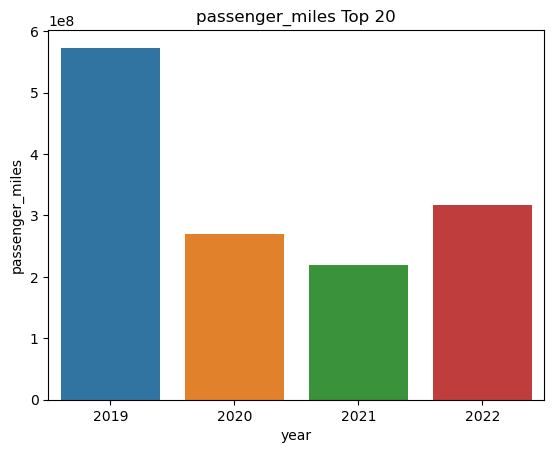

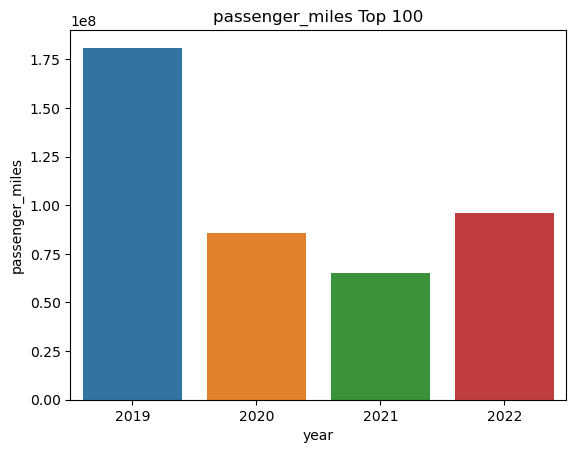

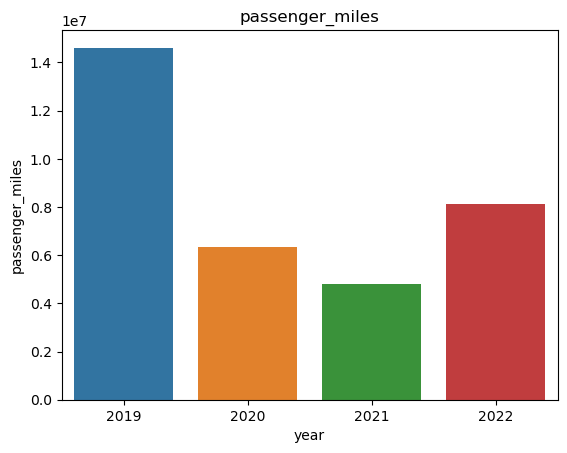

In [10]:
yearly_breakdown(df, 'passenger_miles', 20)
yearly_breakdown(df, 'passenger_miles', 100)
yearly_breakdown(df, 'passenger_miles')

### Cost per passenger mile has sharply increased for top 20, 100, and all agencies. However, the cost increase is most sharp for the top agencies. 

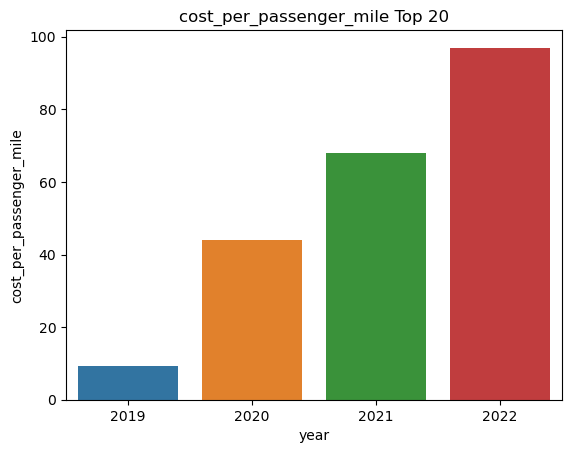

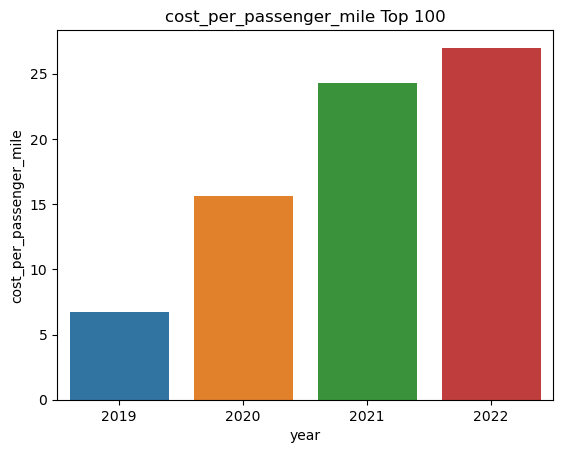

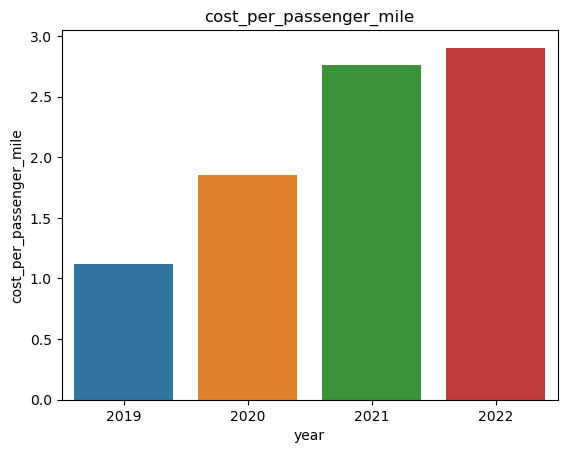

In [11]:
yearly_breakdown(df, 'cost_per_passenger_mile', 20)
yearly_breakdown(df, 'cost_per_passenger_mile', 100)
yearly_breakdown(df, 'cost_per_passenger_mile', None)

In [12]:
df.sample()

,agency,city,state,legacy_ntd_id,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,passengers_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,any_data_questionable?,year,uza_name,passengers_per_vehicle_revenue_hour
2667,"City of Loveland, Colorado, dba: City of Lovel...",Loveland,CO,8025,80025,"City, County or Local Government Unit or Depar...",Full Reporter,264465.0,8.0,MB,DO,5.0,0.71,0.04,136.25,7.3,18.64,3.93,78643.0,2056347.0,110313.0,15092.0,522924.0,254801.0,No,2019,NaN,NaN


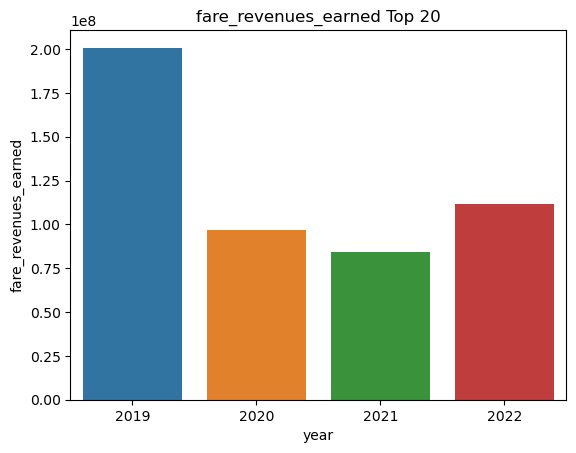

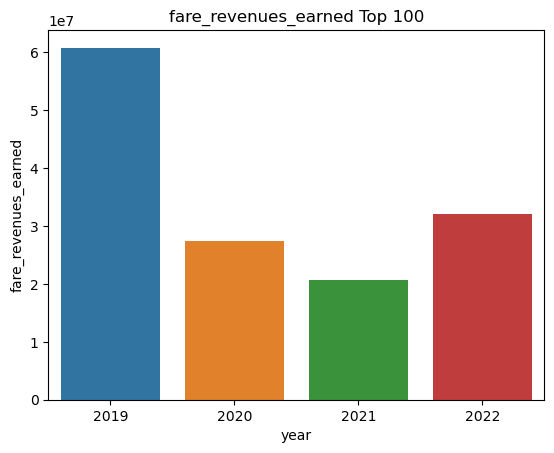

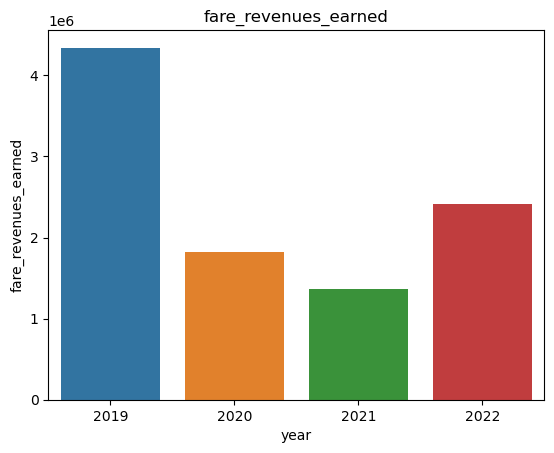

In [13]:
yearly_breakdown(df, 'fare_revenues_earned', 20)
yearly_breakdown(df, 'fare_revenues_earned', 100)
yearly_breakdown(df, 'fare_revenues_earned', None)

### Operating expenses saw a small increase but have gone back to their pre-COVID levels or even a bit higher.

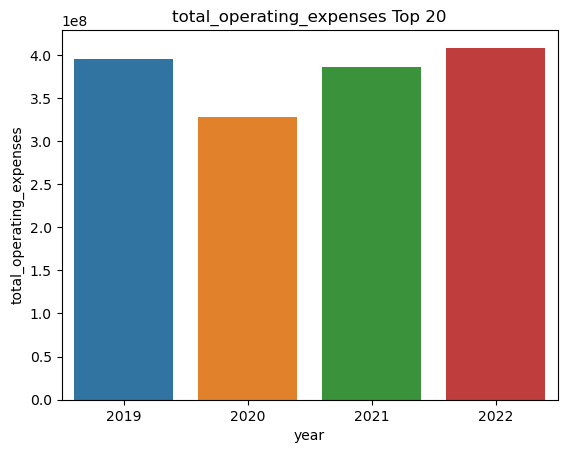

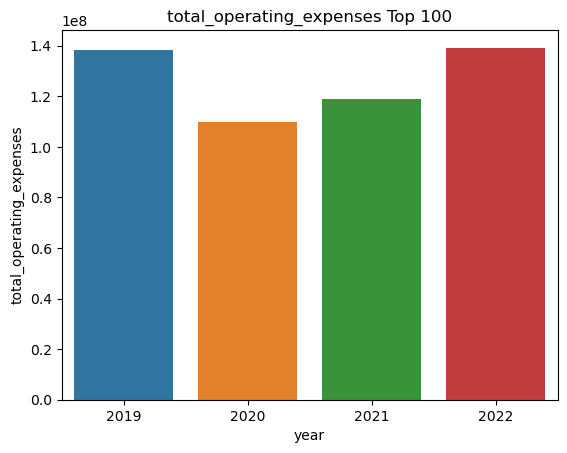

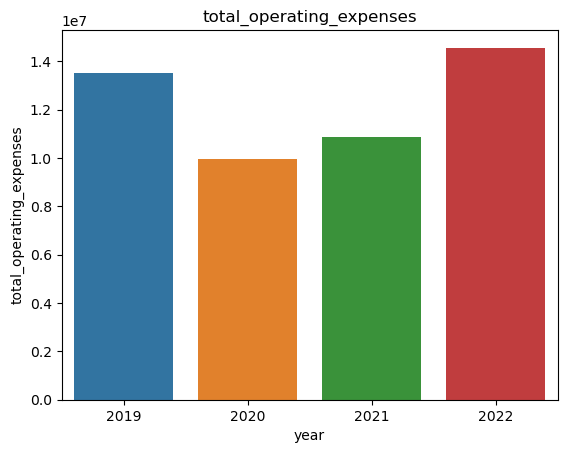

In [14]:
yearly_breakdown(df, 'total_operating_expenses', 20)
yearly_breakdown(df, 'total_operating_expenses', 100)
yearly_breakdown(df, 'total_operating_expenses', None)

In [15]:
df.sample()

,agency,city,state,legacy_ntd_id,ntd_id,organization_type,reporter_type,primary_uza_population,agency_voms,mode,tos,mode_voms,fare_revenues_per_unlinked_passenger_trip,fare_revenues_per_total_operating_expense_(recovery_ratio),cost_per_hour,passengers_per_hour,cost_per_passenger,cost_per_passenger_mile,fare_revenues_earned,total_operating_expenses,unlinked_passenger_trips,vehicle_revenue_hours,passenger_miles,vehicle_revenue_miles,any_data_questionable?,year,uza_name,passengers_per_vehicle_revenue_hour
1378,"Butler Transit Authority, dba: The Bus",Butler,PA,3R04-001,30141,Independent Public Agency or Authority of Tran...,Reduced Reporter,1733853.0,27.0,CB,PT,5.0,3.81,0.33,82.21,7.1,11.59,0.0,108777.0,330881.0,28552.0,4025.0,0.0,106112.0,No,2019,NaN,NaN


### What transportation modes seem the most important?

In [16]:
mode_dict = {
    "AR": "Alaska Railroad",
    "MB": "Bus",
    "RB": "Bus Rapid Transit",
    "CC": "Cable Car",
    "CB": "Commuter Bus",
    "CR": "Commuter Rail",
    "DR": "Demand Response",
    "DT": "Demand Response Taxi",
    "FB": "Ferryboat",
    "HR": "Heavy Rail",
    "YR": "Hybrid Rail",
    "IP": "Inclined Plane",
    "LR": "Light Rail",
    "MG": "Monorail/Automated Guideway",
    "SR": "Streetcar Rail",
    "TB": "Trolleybus",
    "VP": "Vanpool",
    "JT": "Jitney",
    "TR": "Aerial Tramway",
    "PB": "Publico"
}
df['mode_full_name'] = df['mode'].apply(lambda x: mode_dict[x] if not pd.isna(x) else x)

### Many of the top mode/agency combinations are some kind of rail.

In [17]:
df.groupby(['city', 'ntd_id', 'mode_full_name']) \
    .passenger_miles.mean().sort_values(ascending=False).head(20)

city          ntd_id  mode_full_name
New York      20008   Heavy Rail        1.046278e+10
Brooklyn      20008   Heavy Rail        5.800255e+09
Jamaica       20100   Commuter Rail     2.875286e+09
New York      20078   Commuter Rail     1.552262e+09
              20008   Bus               1.478430e+09
Newark        20080   Commuter Rail     1.285259e+09
Brooklyn      20008   Bus               1.006668e+09
Chicago       50066   Heavy Rail        9.966938e+08
Oakland       90003   Heavy Rail        8.348189e+08
Washington    30030   Heavy Rail        7.259552e+08
Jersey City   20098   Heavy Rail        4.470207e+08
Boston        10003   Commuter Rail     4.074480e+08
Newark        20080   Bus               3.986307e+08
Chicago       50066   Bus               3.835275e+08
Los Angeles   90154   Bus               3.792204e+08
Chicago       50118   Commuter Rail     3.639598e+08
Boston        10003   Heavy Rail        3.480195e+08
Philadelphia  30019   Commuter Rail     3.401364e+08
New York 

### Surprisingly (to me), buses are a negligible fraction of passenger miles traveled. 

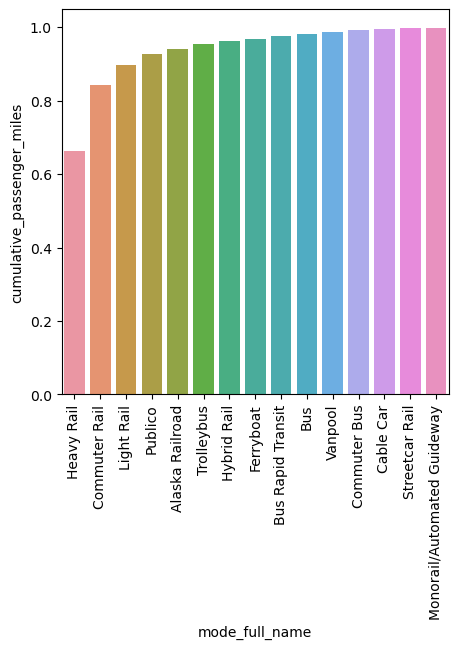

In [18]:
col = 'passenger_miles'
topn = 15

group = df.groupby(['mode_full_name'])[col].mean().sort_values(ascending=False).reset_index()
total_miles = group[col].sum()
group[f'cumulative_{col}'] = group[col].cumsum() / total_miles

group = group.head(topn)

plt.figure(figsize=(5, 5))
sns.barplot(group, x='mode_full_name', y=f'cumulative_{col}')
plt.xticks(rotation=90)  # Rotate labels to be vertical
plt.show()

In [19]:
def yearly_breakdown_by_mode(df, col, modes, topn_agencies=None):
    """
        Modes is a list of mode_full_name values.
    """

    df = df.copy()

    if len(modes) > 0:
        df = df[df['mode_full_name'].isin(modes)]

    if topn_agencies is not None:
        topids = df.groupby('ntd_id')[col].mean() \
            .sort_values(ascending=False).head(topn_agencies).index
        df = df[df.ntd_id.isin(topids)]
    group = df.groupby(['year', 'mode_full_name'])[col].mean().reset_index()
    sns.barplot(data=group, x='year', y=col, hue='mode_full_name')

    title = f'{col}'

    if topn_agencies is not None:
        title = title + f' Top {topn_agencies}.'
    if modes is not None:
        title = title + f' Modes: {modes}'
    plt.title(title)
    plt.show()

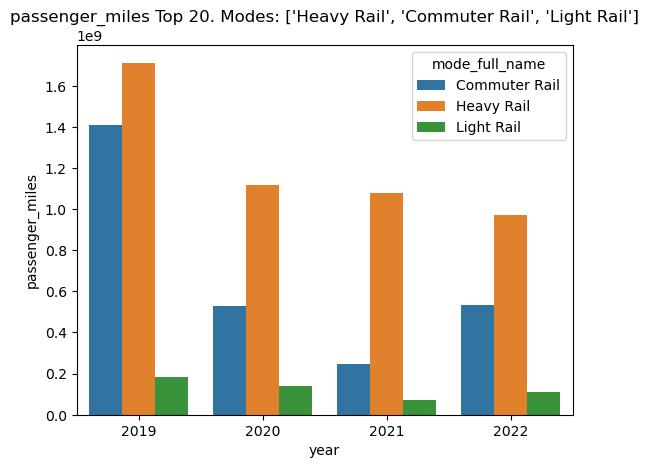

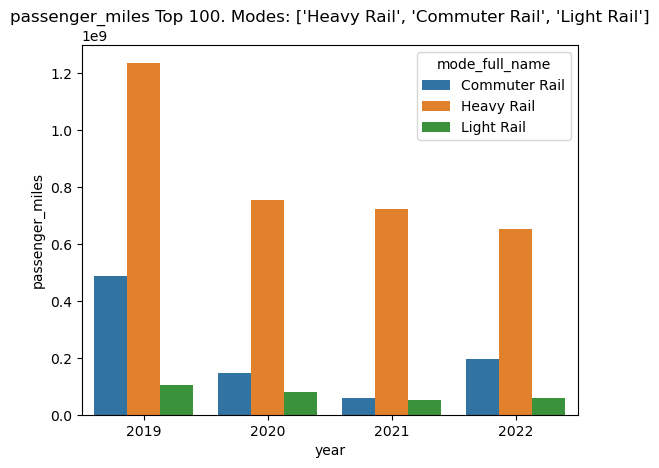

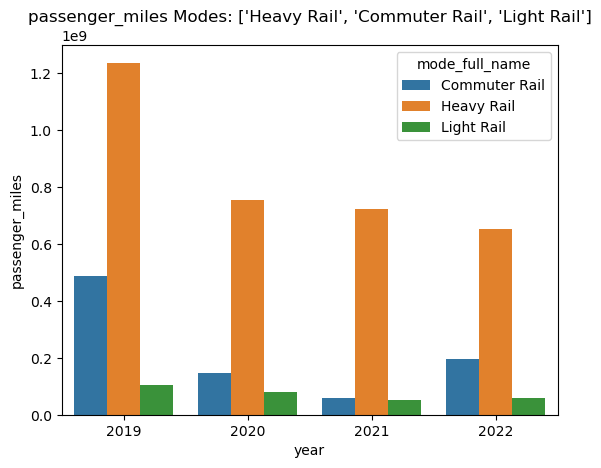

In [20]:
yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Heavy Rail', 'Commuter Rail', 'Light Rail'], 
    20
)

yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Heavy Rail', 'Commuter Rail', 'Light Rail'], 
    100
)

yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Heavy Rail', 'Commuter Rail', 'Light Rail'], 
    None
)

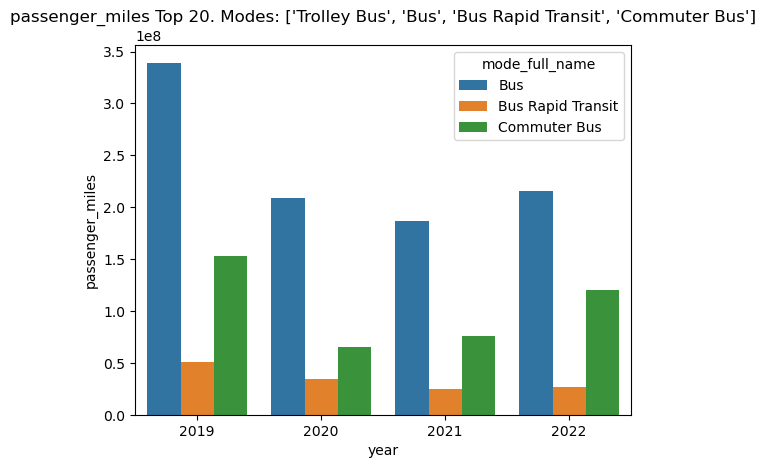

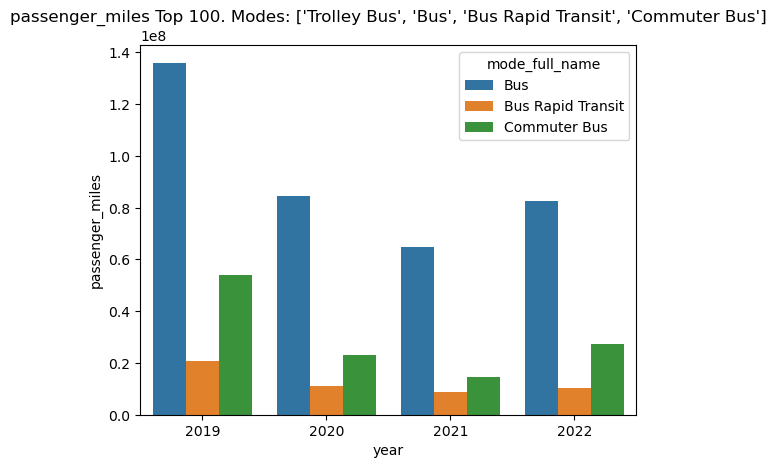

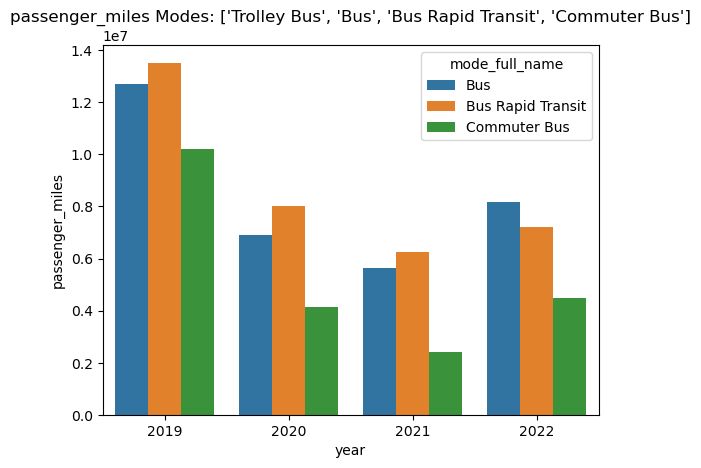

In [21]:
yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Trolley Bus', 'Bus', 'Bus Rapid Transit', 'Commuter Bus'], 
    20
)

yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Trolley Bus', 'Bus', 'Bus Rapid Transit', 'Commuter Bus'], 
    100
)

yearly_breakdown_by_mode(
    df, 
    'passenger_miles',
    ['Trolley Bus', 'Bus', 'Bus Rapid Transit', 'Commuter Bus'], 
    None
)

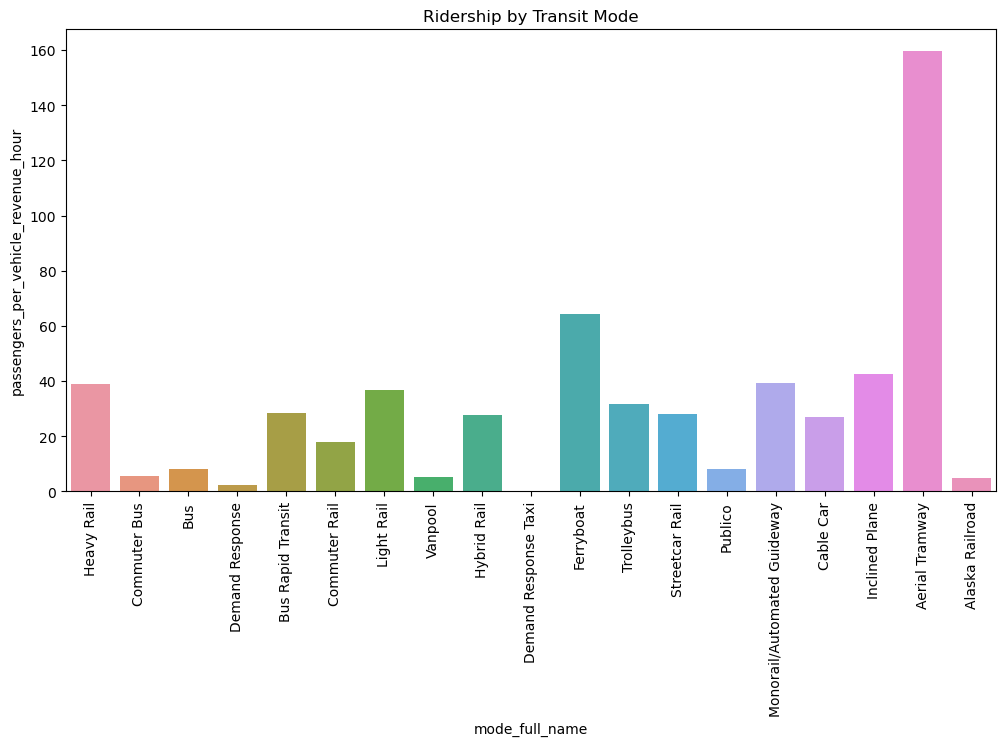

In [22]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='mode_full_name', y='passengers_per_vehicle_revenue_hour', errorbar=None)
plt.title('Ridership by Transit Mode')
plt.xticks(rotation=90)
plt.show()

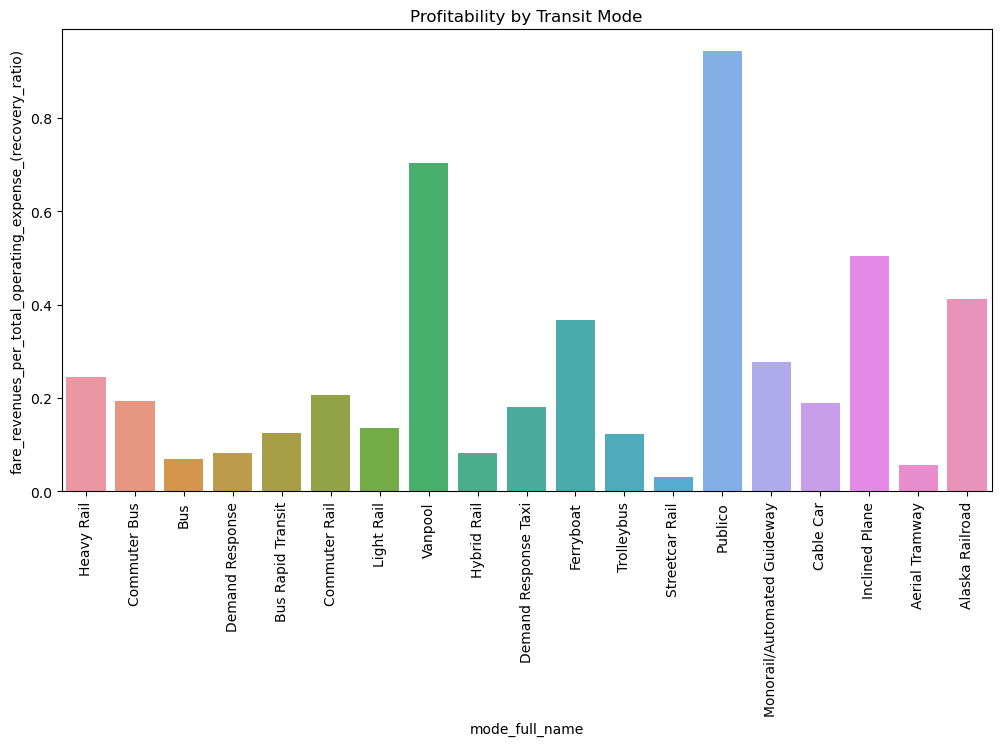

In [23]:
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='mode_full_name', y='fare_revenues_per_total_operating_expense_(recovery_ratio)', errorbar=None)
plt.title('Profitability by Transit Mode')
plt.xticks(rotation=90)
plt.show()

[Text(0, 0, 'Heavy Rail'),
 Text(1, 0, 'Commuter Bus'),
 Text(2, 0, 'Bus'),
 Text(3, 0, 'Demand Response'),
 Text(4, 0, 'Bus Rapid Transit'),
 Text(5, 0, 'Commuter Rail'),
 Text(6, 0, 'Light Rail'),
 Text(7, 0, 'Vanpool'),
 Text(8, 0, 'Hybrid Rail'),
 Text(9, 0, 'Demand Response Taxi'),
 Text(10, 0, 'Ferryboat'),
 Text(11, 0, 'Trolleybus'),
 Text(12, 0, 'Streetcar Rail'),
 Text(13, 0, 'Publico'),
 Text(14, 0, 'Monorail/Automated Guideway'),
 Text(15, 0, 'Cable Car'),
 Text(16, 0, 'Inclined Plane'),
 Text(17, 0, 'Aerial Tramway'),
 Text(18, 0, 'Alaska Railroad')]

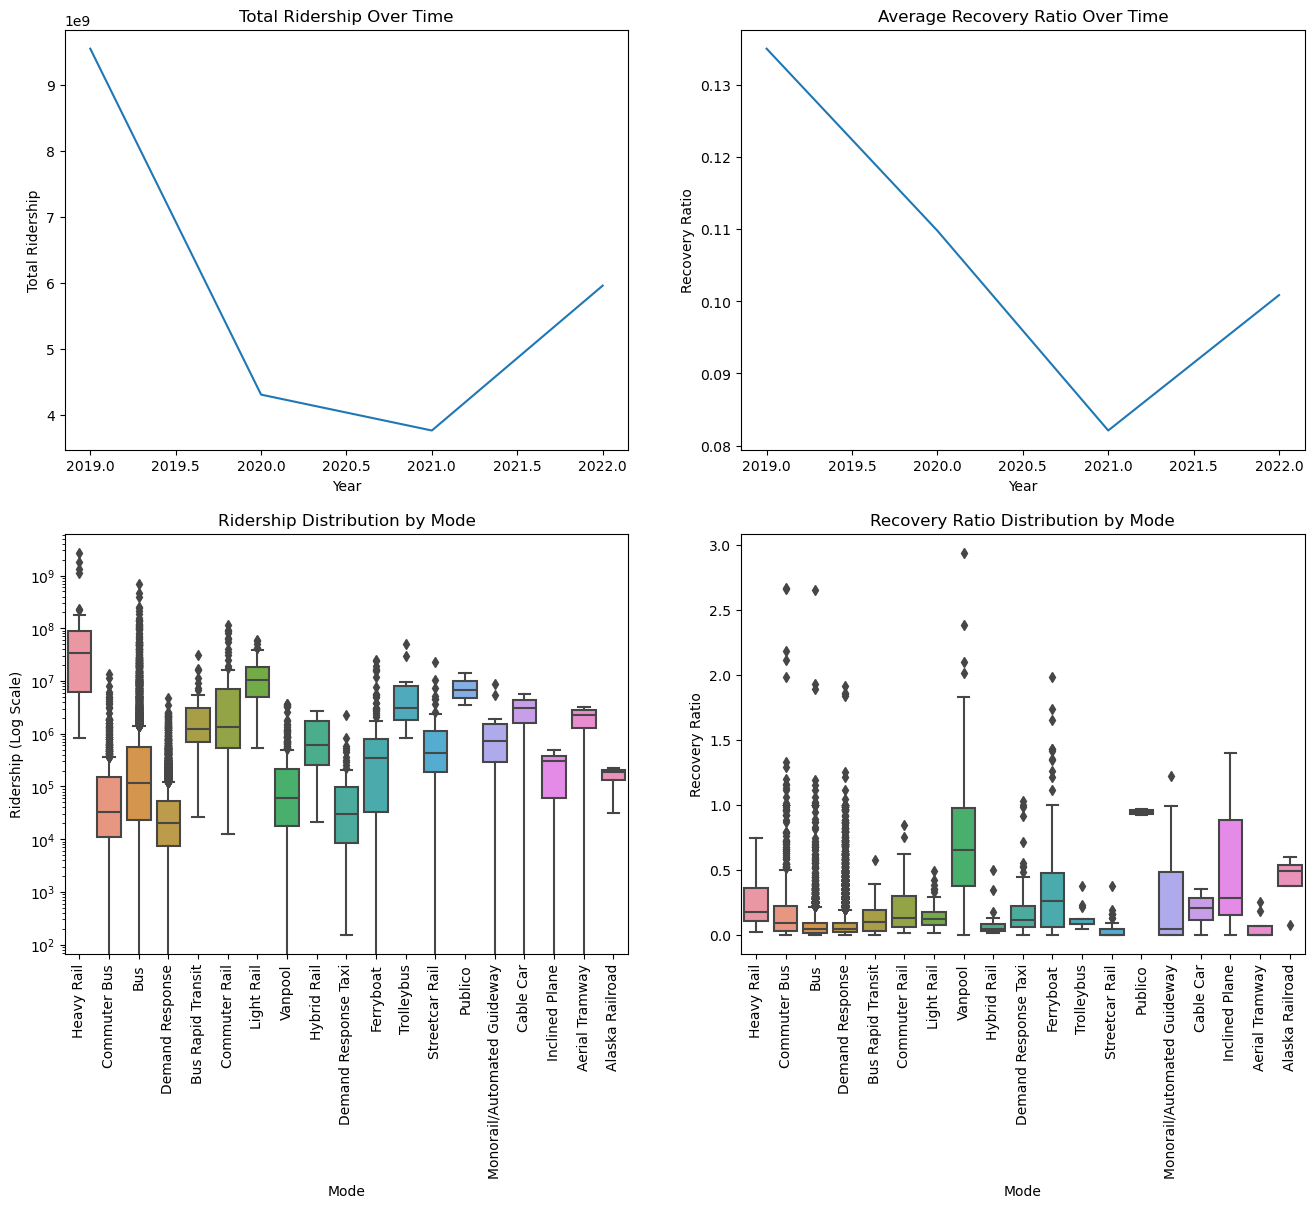

In [40]:
df['year'] = df['year'].astype('category')
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot 1: Total Ridership Over Time
sns.lineplot(ax=axes[0, 0], data=df, x='year', y='unlinked_passenger_trips', estimator='sum', errorbar=None)
axes[0, 0].set_title('Total Ridership Over Time')
axes[0, 0].set_ylabel('Total Ridership')
axes[0, 0].set_xlabel('Year')

# Plot 2: Average Recovery Ratio Over Time
sns.lineplot(ax=axes[0, 1], data=df, x='year', y='fare_revenues_per_total_operating_expense_(recovery_ratio)', estimator='mean', errorbar=None)
axes[0, 1].set_title('Average Recovery Ratio Over Time')
axes[0, 1].set_ylabel('Recovery Ratio')
axes[0, 1].set_xlabel('Year')

# Plot 3: Ridership Distribution by Mode
sns.boxplot(ax=axes[1, 0], data=df, x='mode_full_name', y='unlinked_passenger_trips')
axes[1, 0].set_title('Ridership Distribution by Mode')
axes[1, 0].set_yscale('log')
axes[1, 0].set_ylabel('Ridership (Log Scale)')
axes[1, 0].set_xlabel('Mode')
axes[1, 0].set_xticklabels(axes[1, 0].get_xticklabels(),rotation=90)

sns.boxplot(ax=axes[1, 1], data=df, x='mode_full_name', y='fare_revenues_per_total_operating_expense_(recovery_ratio)')
axes[1, 1].set_title('Recovery Ratio Distribution by Mode')
axes[1, 1].set_ylabel('Recovery Ratio')
axes[1, 1].set_xlabel('Mode')
axes[1, 1].set_xticklabels(axes[1, 1].get_xticklabels(),rotation=90)



### Interpretation:

Total Ridership Over Time - In the pandemic years, 2020 - 2021, we observed a decreasing trend in the transit ridership. In 2022, the ridership has increased, indicating that the transit system is on the road to recovery.

Profitability (Average Recovery Ratio) Over Time - We see a similar trend as we observed in case of riderships, a decreasing trend with tehe least amount of recovery in 2021 and then an improvement starting 2022.

Ridership Distribution by Mode - This boxplot illustrates the distribution of ridership across different modes of transportation, using a logarithmic scale for better visibility of the wide range of values. This visualization helps identify which modes have higher ridership levels and the variability within each mode. 

Distribution of Ridership by Mode:
- Variability: The box plots for ridership by mode showed a wide range of variability in ridership across different transportation modes. The spread of the data can be seen in the height of each box and the lines extending from them (whiskers), indicating significant differences in ridership levels among modes.
- Median Ridership: The line within each box represents the median ridership for that mode. Modes with higher medians are used more frequently, suggesting they are more integral to the transit system in the covered localities. The top modes are the Heavy rail and the Light rail. 
- Outliers: Points outside the whiskers indicate outliers, representing modes of transport that have exceptionally high or low ridership compared to the typical range. These outliers can point to specific modes that either are underused or have peak usage due to specific factors (e.g., seasonal use, special events). For example: buses have many outliers which may be due to seasonal usage during the academic months by students. 
- Interquartile Range (IQR): The height of the box (the IQR) shows the middle 50% of data for ridership in each mode. A taller box indicates greater variability in ridership numbers, while a shorter box suggests more consistency among ridership figures within that mode. A ferryboat has a taller box indicating the most variability in ridership numbers which may be due to ferryboats being used less dueing the winter months. The Alaskan railroad has the least amount of variability which may be an indication that it might be the most frequently used/ popular/ easiest mode of travel for that state.


Recovery Ratio Distribution by Mode:
- Variability in Profitability: Similar to ridership, the box plots for the recovery ratio (fare revenues per total operating expense) across different modes showed variability in how well different modes recover their operating expenses through fares. This variability indicates that some modes are more financially sustainable than others.
- Median Recovery Ratio: The median recovery ratio within each box provides insight into the typical financial performance of each mode. Modes with higher median recovery ratios are more effective at covering their operating costs through fare revenues.
- Outliers in Profitability: Outliers in these box plots highlight modes with exceptionally high or low recovery ratios, indicating either unusually efficient cost recovery or challenges in achieving financial sustainability.
- Consistency in Financial Performance: The IQR in these plots shows the consistency of financial performance within modes. A narrow box indicates that most of the data points for that mode are clustered around the median, suggesting consistent financial performance. A wider box indicates greater variability in how well the mode covers its operating expenses.

  
- Overall Interpretation: The box plots provide a comprehensive overview of both ridership and financial sustainability across different transportation modes. Modes with consistently high ridership and recovery ratios are likely key components of the transit system, potentially benefiting from targeted investments and policy support. Conversely, modes with lower ridership and recovery ratios might require further analysis to understand the challenges they face and to identify opportunities for improvement.

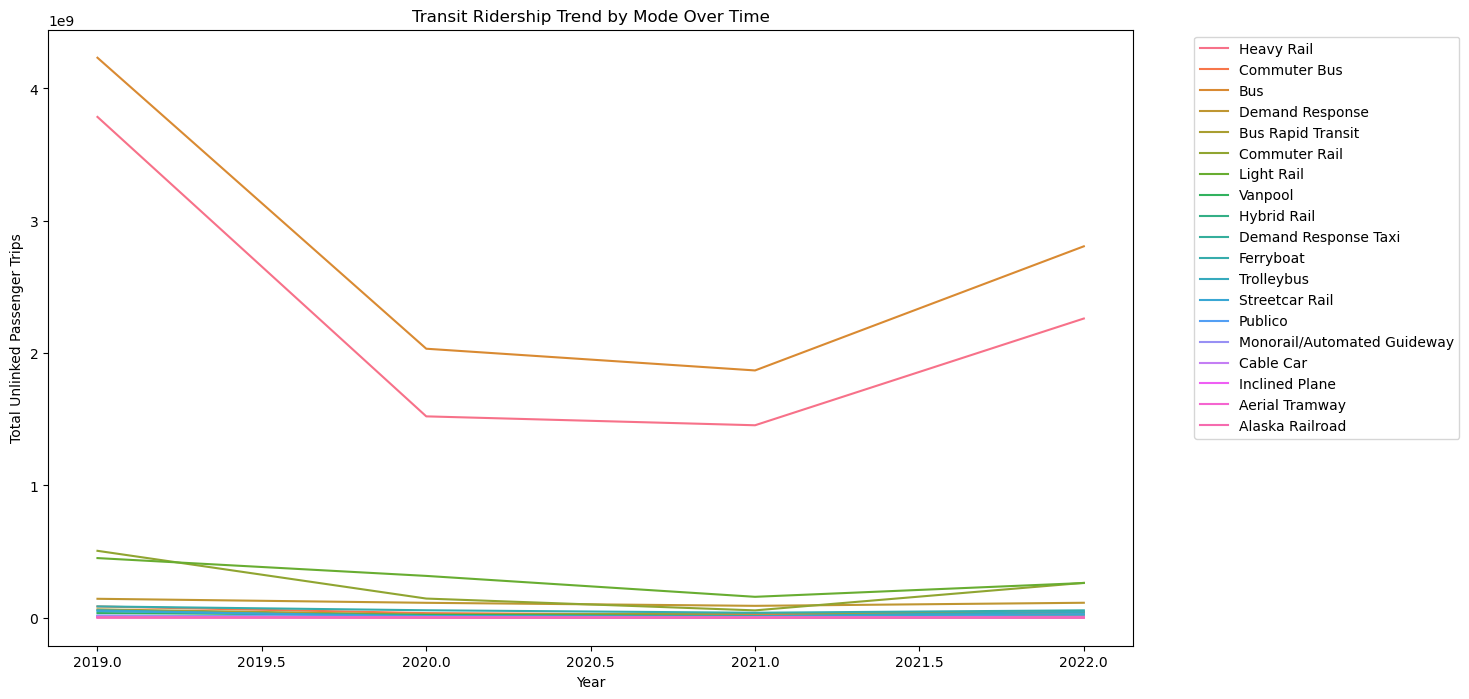

In [25]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year', y='unlinked_passenger_trips', hue='mode_full_name', estimator='sum', errorbar=None)
plt.title('Transit Ridership Trend by Mode Over Time')
plt.xlabel('Year')
plt.ylabel('Total Unlinked Passenger Trips')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Interpretation
Heavy Rail and Buses see the most total of unlinked passenger trips over time. 
Although, they both saw a decrease in the number of passenger trips during the pandemic (2021-2022), they are seeing an increasing trend starting 2022 and still have the most passenger trips comparitively.

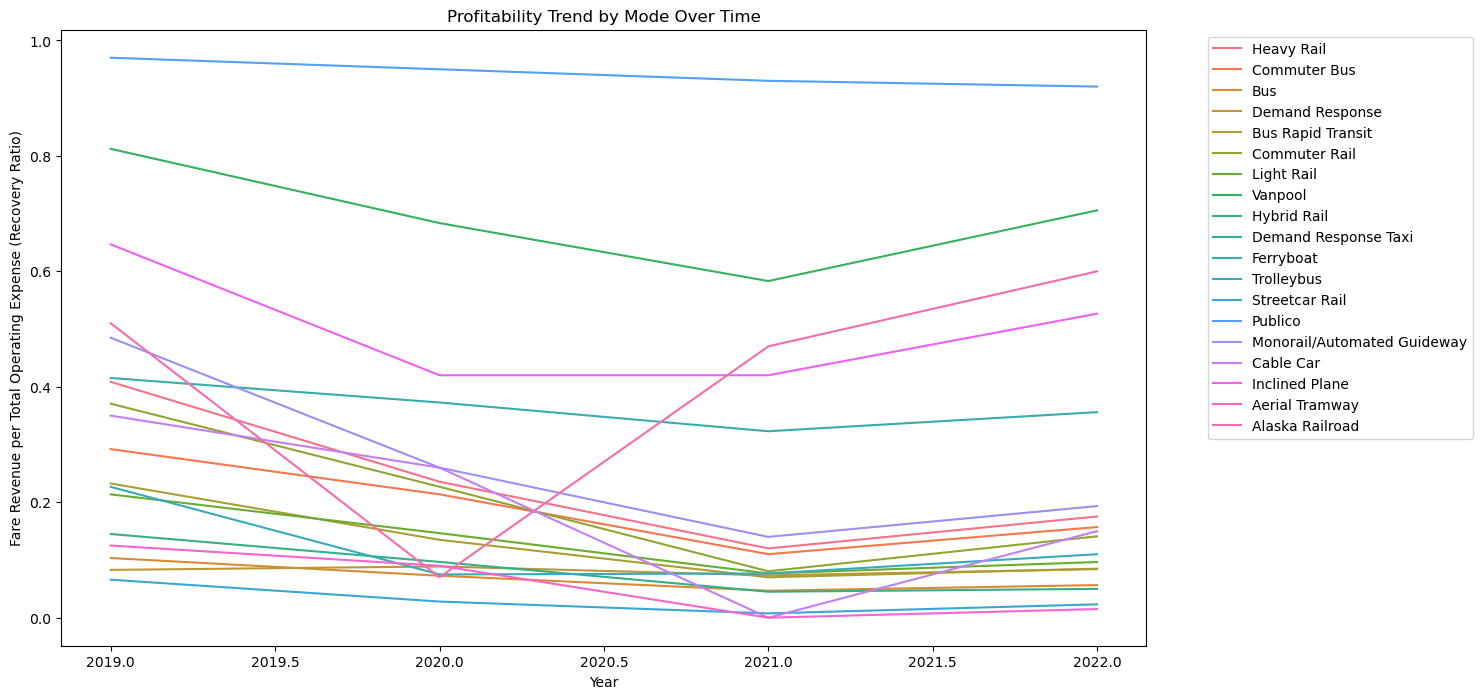

In [26]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=df, x='year', y='fare_revenues_per_total_operating_expense_(recovery_ratio)', hue='mode_full_name', estimator='mean', errorbar=None)
plt.title('Profitability Trend by Mode Over Time')
plt.xlabel('Year')
plt.ylabel('Fare Revenue per Total Operating Expense (Recovery Ratio)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Interpretation

- The Publico has the highest recovery ratio (profitability) over time. Although there is a decrease in trend, the decrease is not sharp.
- The Alaskan Railroad has the maximum improvement, as seen by its recovery ratio (profitability) being greater than what was in 2019.
- The Vanpool and the Inclined Plane also have an increasing trend.

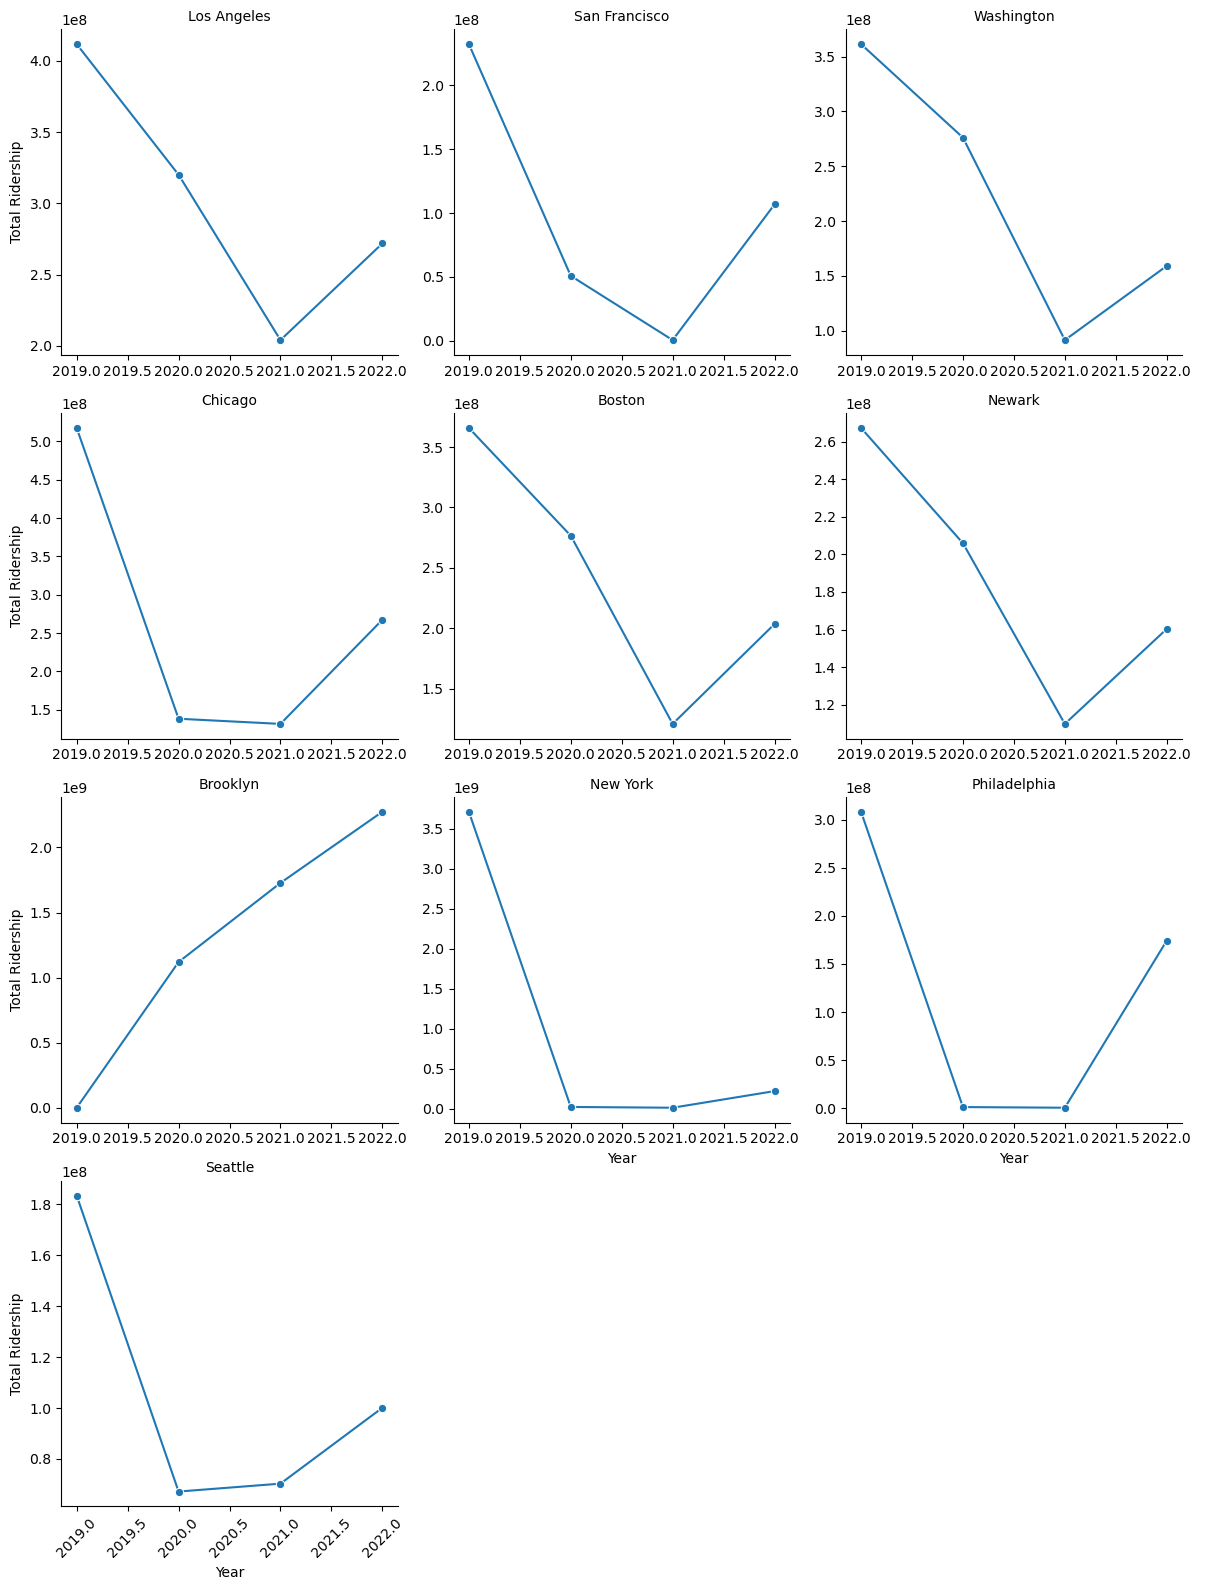

In [27]:
# Assuming 'year' is already converted to a categorical or numerical type for aggregation
ridership_trend = df.groupby(['state', 'city', 'year'])['unlinked_passenger_trips'].sum().reset_index()

# Plotting the trend of ridership for top cities/states by total ridership
top_cities_states = ridership_trend.groupby(['state', 'city'])['unlinked_passenger_trips'].sum().nlargest(10).index.tolist()

# Filter data for top cities/states
ridership_trend_filtered = ridership_trend[ridership_trend.set_index(['state', 'city']).index.isin(top_cities_states)]

g = sns.FacetGrid(ridership_trend_filtered, col='city', col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.lineplot, 'year', 'unlinked_passenger_trips', marker='o')
g.add_legend()
g.set_titles('{col_name}')
g.set_axis_labels("Year", "Total Ridership")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation: Ridership increase

- Most cities had seen a decrease in ridership during the pandemic years 2020-2021, and then have started to recover as seen by the upward trend.
- Philadelphia is the most close to recovery.
- However, Brooklyn has not seen a downward trend even during the pandemic.


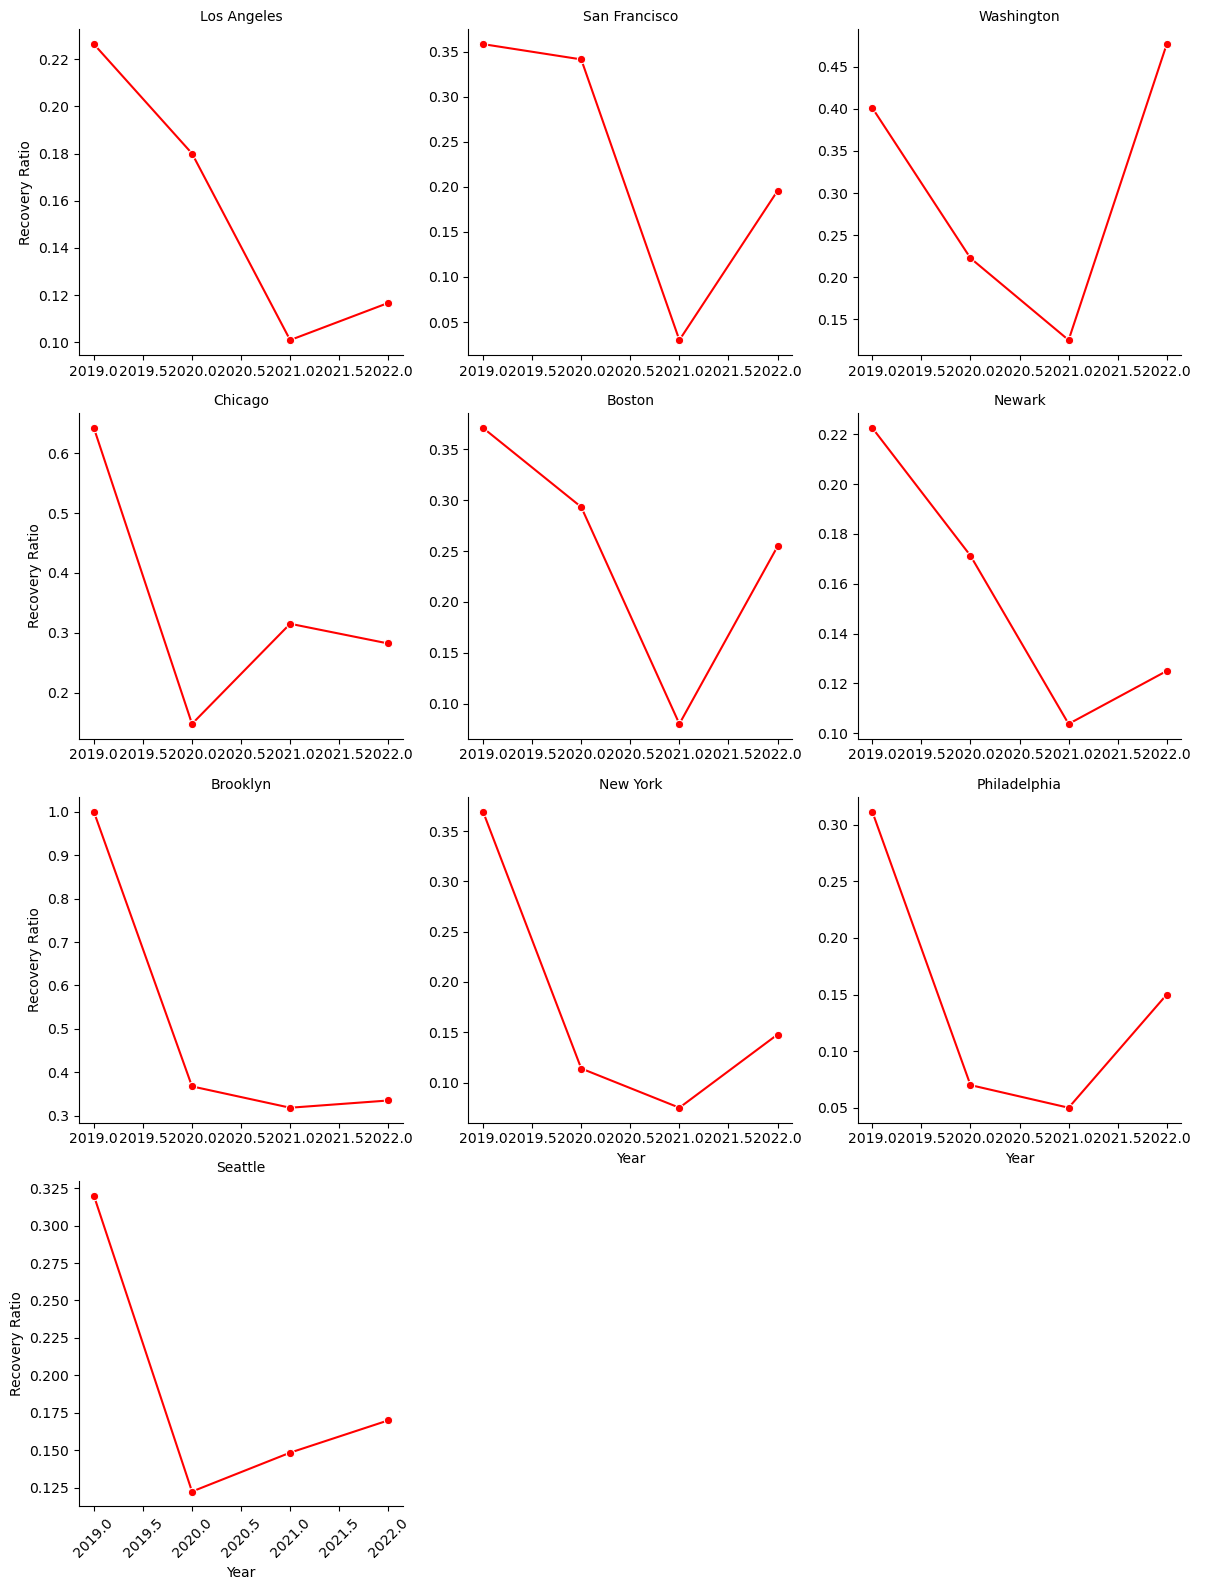

In [28]:
profitability_trend = df.groupby(['state', 'city', 'year'])['fare_revenues_per_total_operating_expense_(recovery_ratio)'].mean().reset_index()

# Plotting the trend of recovery ratio for the same top cities/states identified by ridership
profitability_trend_filtered = profitability_trend[profitability_trend.set_index(['state', 'city']).index.isin(top_cities_states)]

g = sns.FacetGrid(profitability_trend_filtered, col='city', col_wrap=3, sharex=False, sharey=False, height=4)
g.map(sns.lineplot, 'year', 'fare_revenues_per_total_operating_expense_(recovery_ratio)', marker='o', color='r')
g.add_legend()
g.set_titles('{col_name}')
g.set_axis_labels("Year", "Recovery Ratio")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Interpretation: Profitability increase

- Most cities had seen a decrease in profitability during the pandemic years 2020-2021, and since then have started to recover as seen by the upward trend.
- Washignton's profit's in 2022 have recovered the most.